In [2]:
import pandas as pd

# 데이터 추출 (~2022)
data = pd.read_csv('../data/dataframe_final.csv', index_col=0)
label = pd.read_csv('../data/label_final.csv', index_col=0)
data_std = pd.read_csv('../data/dataframe_std.csv', index_col=0)

# 라벨 추출 (2023)
data2023 = pd.read_csv('../data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('../data/dataframes/label_2023to2023.csv', index_col=0)

In [3]:
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897


In [4]:
data_std

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,-1.722298,-1.535255,1.728570,0.476007,0.441364,-0.370877,-2.169749,1.137675,0.862400,0.575627,0.693994
1963-01-01,-1.722298,-1.023289,-1.359900,-0.175764,0.441364,-0.848745,0.084397,-0.861027,0.438857,-0.325204,-1.121667
1963-01-01,-1.722298,1.106741,1.648350,0.579505,0.441364,-0.655634,-0.563213,-0.443486,-0.885160,1.350760,1.813920
1963-01-01,-1.722298,-0.277463,-0.076380,0.924059,0.441364,-0.960029,0.682044,2.349643,1.755756,0.056078,0.586356
1963-01-01,-1.722298,1.226832,1.377608,0.602431,0.441364,0.313195,-0.103929,2.358433,-1.123626,0.814451,0.110790
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.943388,-0.441797,0.760917,-0.967060,0.441364,-0.897841,-0.884136,-0.861027,-0.073666,0.420600,-0.024736
2022-12-26,1.943388,-0.068884,0.695738,0.101976,-1.457158,-0.976395,-1.879574,1.173936,0.563429,0.739033,-0.920090
2022-12-26,1.943388,0.101771,0.389899,-0.526214,0.441364,1.039817,0.280410,-0.778617,-0.027396,-0.098949,-0.733191
2022-12-26,1.943388,-0.245860,-0.617865,0.815321,0.441364,0.820521,1.738975,-0.773123,-0.148409,-0.136658,-1.102586


In [5]:
data2023['date'] = data2023['date'] + 835

In [6]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        if idx != dayformat:
            X = dataframe.loc[dayformat].values
            y = label.loc[dayformat].values
            
            s = np.arange(X.shape[0])
            np.random.shuffle(s)
            X = X[s]
            y = y[s]
            
            Xs.append(X)
            ys.append(y)
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

data2023_std = scaler.transform(data2023)
data2023_std = pd.DataFrame(data2023_std, columns=data2023.columns, index=data2023.index)

In [8]:
# 인덱스(연-월-일) 삭제

X_train, y_train = create_sequences(1963, data, label)
X_test, y_test = create_sequences(2023, data2023, label2023)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3131,) (3131,)
(52, 100, 11) (52, 100, 1)


In [10]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [11]:
X_train = sequenceFlatter(X_train)
X_test = sequenceFlatter(X_test)
y_train = sequenceFlatter(y_train)
y_test = sequenceFlatter(y_test)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313087, 11) (313087, 1)
(5200, 11) (5200, 1)


In [13]:
# 의사결정트리 회귀 모델 생성 및 학습

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [13]:
# 점수
rf.score(X_test, y_test)

-0.5012290807759503

In [14]:
# 테스트 데이터 랜덤 인덱스 추출

import numpy as np

test_idx = np.random.choice(X_test.shape[0], 100)

In [15]:
# 랜덤 추출한 인덱스를 통해 테스트 데이터와 라벨 생성

X_test_sample = X_test[test_idx]
y_test_sample = y_test[test_idx]

In [16]:
# 테스트 데이터 예측

pred = rf.predict(X_test_sample)

In [17]:
# matplotlib 한글 패치

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False


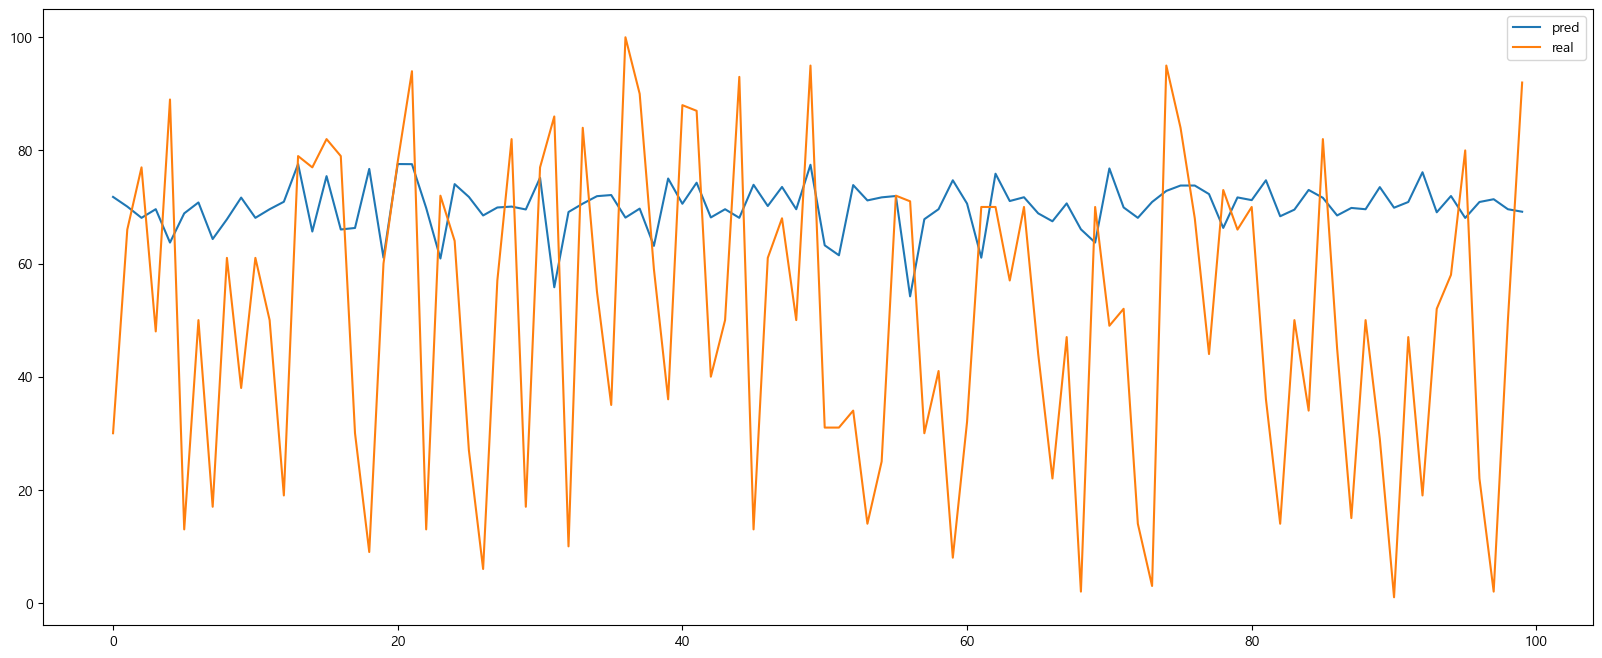

In [18]:
# 그래프 시각화

plt.figure(figsize=(20,8))
plt.plot(pred, label='pred')
plt.plot(y_test_sample, label='real')
plt.legend()
plt.show()

In [15]:
X_train_std, y_train_std = create_sequences(1963, data_std, label)
X_test_std, y_test_std = create_sequences(2023, data2023_std, label2023)

In [16]:
X_train_std = sequenceFlatter(X_train_std)
X_test_std = sequenceFlatter(X_test_std)
y_train_std = sequenceFlatter(y_train_std)
y_test_std = sequenceFlatter(y_test_std)

In [21]:
rf_std = RandomForestRegressor()

rf_std.fit(X_train_std, y_train_std)

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [22]:
rf_std.score(X_test_std, y_test)

-0.47294442685074434

In [23]:
test_idx_std = np.random.choice(X_test_std.shape[0], 100)

X_test_std_sample = X_test_std[test_idx_std]
y_test_std_sample = y_test_std[test_idx_std]

In [24]:
pred_std = rf_std.predict(X_test_std)

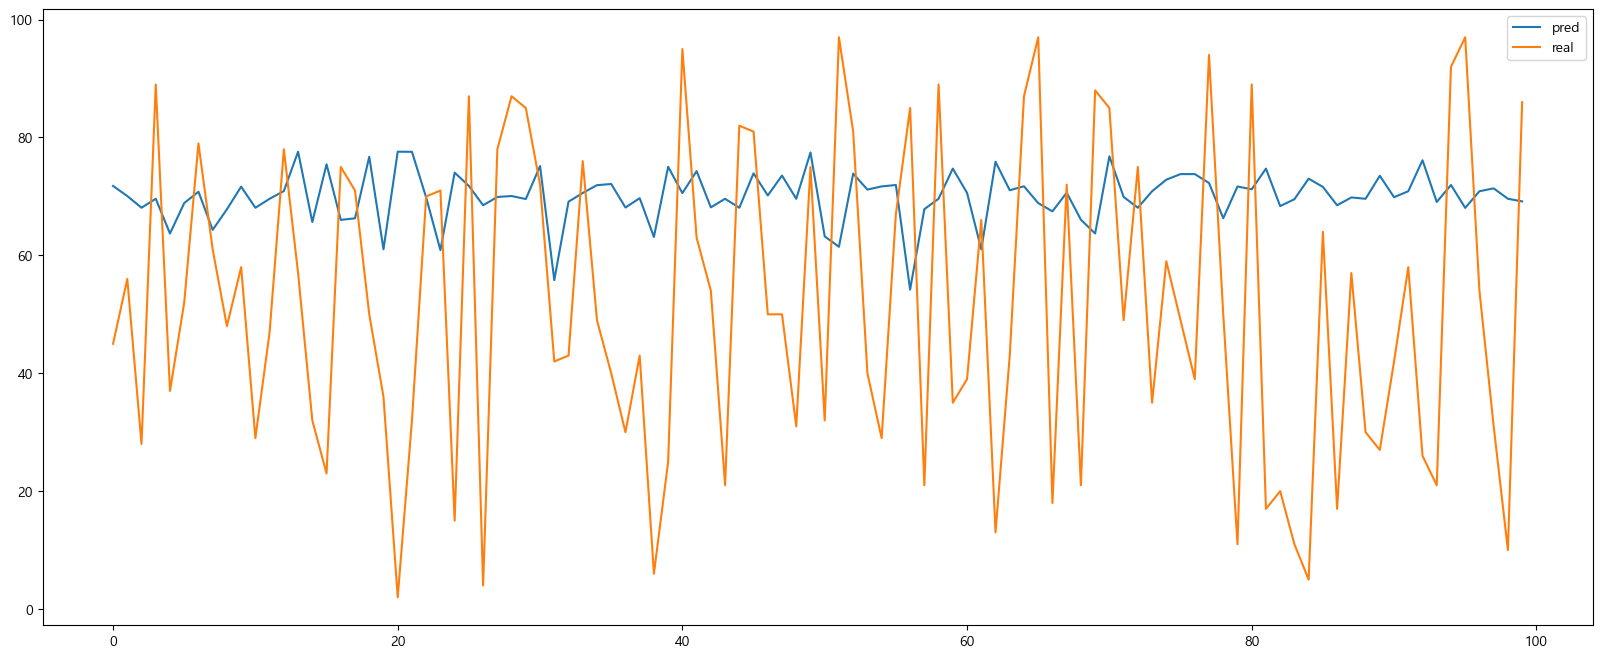

In [25]:
# 그래프 시각화

plt.figure(figsize=(20,8))
plt.plot(pred, label='pred')
plt.plot(y_test_std_sample, label='real')
plt.legend()
plt.show()

In [29]:
parameters={"bootstrap":[True,False],
            "max_depth" : [1,5,7,11],
           "min_samples_leaf":[1,2,3,5,7,11],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }

In [27]:
from sklearn.model_selection import GridSearchCV
import joblib

# GridSearchCV로 RandomForestRegressor의 최적 파라미터 찾기
# 최적 모델 선정 후 models/best_RFR.pkl로 저장
# 최적 모델로 2023년 데이터 예측 후 시각화

def getBestRFR(X_train, y_train, title, data, label, parameters):
    rfr = RandomForestRegressor()
    model = GridSearchCV(rfr, param_grid=parameters, n_jobs=-1, scoring='neg_mean_squared_error', error_score='raise')
    model.fit(X_train, y_train)
    
    print(f'{title} 최적 파라미터: {model.best_params_}')
    print(f'{title} 최고 점수: {model.best_score_}')
    bestRFR = model.best_estimator_
    
    joblib.dump(bestRFR, f'../models/best_{title}.pkl')
    
    pred = bestRFR.predict(data)
    plt.figure(figsize=(20,8))
    plt.plot(pred, label='pred')
    plt.plot(label, label='real')
    plt.legend()
    plt.show()

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
13200 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

RFR 최적 파라미터: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 40, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1}
RFR 최고 점수: -789.6699545867064


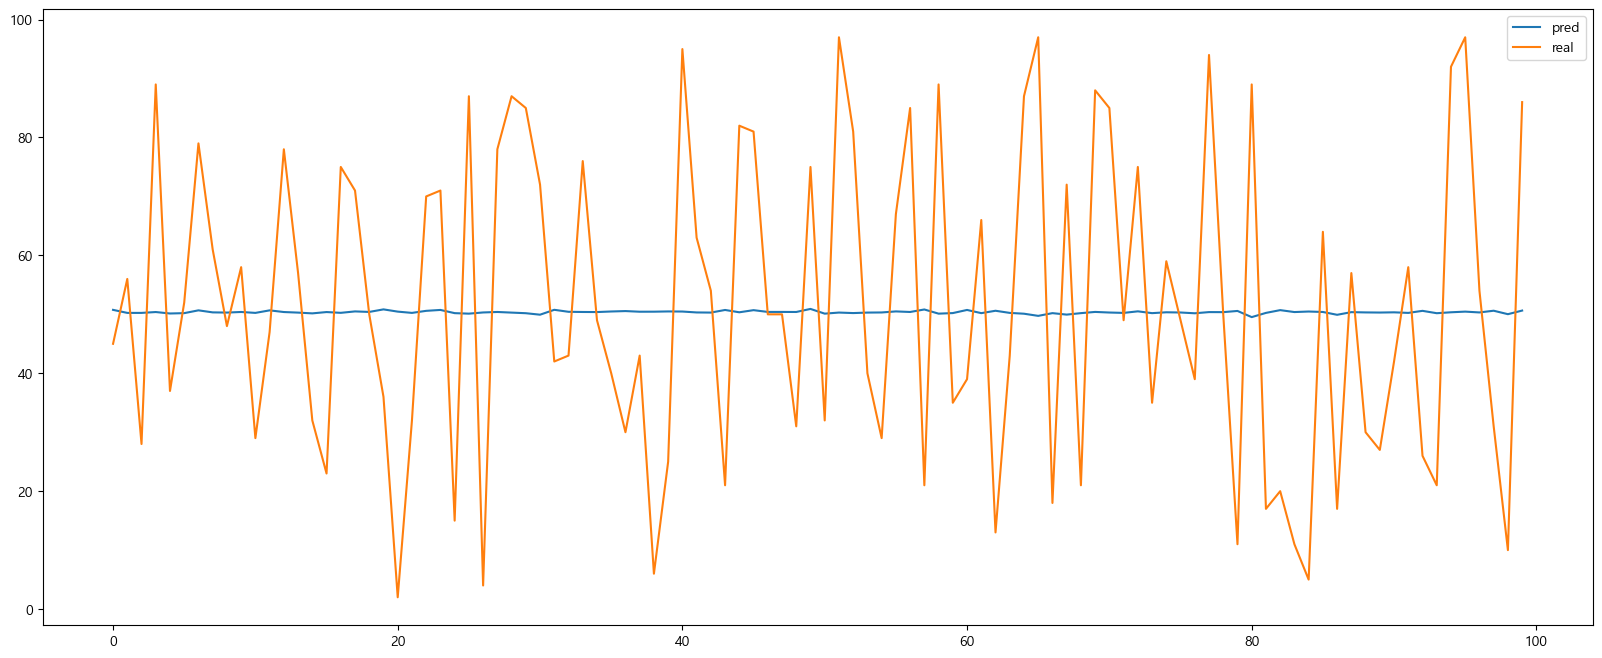

In [31]:
getBestRFR(X_train_std, y_train_std, 'RFR', X_test_std_sample, y_test_std_sample, parameters)

In [32]:
rfr = joblib.load('models/best_RFR.pkl')

rfr.score(X_test_std_sample, y_test_std_sample)

-0.0034536976438357403

In [33]:
rfr.score(X_test_std, y_test_std)

-0.0012425068502415204

In [34]:
rfr.score(X_train_std, y_train_std)

0.006254116731631787

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_std_lda = lda.fit_transform(X_train_std, y_train_std)
X_test_std_lda_sample = lda.transform(X_test_std_sample)

c:\Users\sungc\CommunityAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
parameters={"bootstrap":[True],
            "max_depth" : [1,5,7,11],
           "min_samples_leaf":[1,2,3,5,7,11],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["sqrt"],
           "max_leaf_nodes":[None,10,20,30,40] }

In [31]:
getBestRFR(X_train_std_lda, y_train_std, 'RFR_LDA', X_test_std_sample, y_test_std_sample, parameters)